# IMPORTING SOME LIBRARIES

In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import os
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline
import plotly.express as px

py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

from pprint import pprint as pp

In [3]:
data = pd.read_csv("D:\Data science\SCMS_Delivery_History_Dataset.csv",encoding = "latin1") #reading the file

In [4]:
data.head()

,ï»¿Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,CÃ´te d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,nan
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,"6,200.00",6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,nan
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,CÃ´te d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,"40,000.00",80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,nan
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,"127,360.80",3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,nan
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,"121,600.00",3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,nan


In [5]:
data.shape

(7879, 32)

In [6]:
data.columns

Index(['ï»¿Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [7]:
data.dtypes

ï»¿Project Code                  object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64
Line Item Value                 float64


In [8]:
data["Country"]= data["Country"].astype(str)

In [9]:
data = data.drop(["Item Description"],axis=1) 

In [10]:
data.shape

(7879, 31)

In [11]:
data = data[data["Weight (Kilograms)"]!="Weight Captured Separately"] 
data = data[data["Freight Cost (USD)"]!="Freight Included in Commodity Cost"] 
data = data[data["Freight Cost (USD)"]!="Invoiced Separately"] 

In [12]:
data.shape

(6175, 31)

In [13]:
data.head(11)

,ï»¿Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,CÃ´te d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,nan
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,"6,200.00",6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,nan
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,CÃ´te d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,"40,000.00",80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,nan
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,Lamivudine,Generic,150mg,Tablet,60,31920,"127,360.80",3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,nan
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,Stavudine,Generic,30mg,Capsule,60,38000,"121,600.00",3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,nan
5,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,28-Sep-06,28-Sep-06,28-Sep-06,ARV,Pediatric,Aurobindo Pharma Limited,Zidovudine,Generic,10mg/ml,Oral solution,240,416,"2,225.60",5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,nan
7,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,24-Nov-06,24-Nov-06,24-Nov-06,ARV,Adult,Aurobindo Pharma Limited,Nevirapine,Generic,200mg,Tablet,60,16667,"60,834.55",3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,nan
10,110-ZM-T01,Pre-PQ Process,SCMS-226,ASN-137,Zambia,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,8-Jan-07,8-Jan-07,8-Jan-07,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,NaN,Test kit,20,2500,"100,000.00",40.00,2.00,"Trinity Biotech, Plc",Yes,853,13569.49,nan
12,107-RW-T01,Pre-PQ Process,SCMS-268,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,12/22/2006,27-Feb-07,27-Feb-07,27-Feb-07,ARV,Adult,CIPLA LIMITED,Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,10000,"99,800.00",9.98,0.17,"Cipla, Goa, India",Yes,7416,64179.42,nan
13,106-HT-T01,Pre-PQ Process,SCMS-274,ASN-162,Haiti,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,18-Jan-07,18-Jan-07,18-Jan-07,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,750,"60,000.00",80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,256,1760.32,nan


In [14]:
data = data.dropna(subset =["Line Item Insurance (USD)"])

In [15]:
data.head(10)

,ï»¿Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
18,102-NG-T01,Pre-PQ Process,SCMS-592,ASN-485,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,5/13/2007,19-Jun-07,19-Jun-07,19-Jun-07,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,1000,"80,000.00",80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341,2682.47,128.00
21,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,7/4/2007,15-Oct-07,15-Oct-07,15-Oct-07,ARV,Pediatric,Aurobindo Pharma Limited,Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,"1,920.00",1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
22,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,7/4/2007,27-Aug-07,27-Aug-07,27-Aug-07,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,500,"41,095.00",82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
23,100-HT-T01,Pre-PQ Process,SCMS-10080,ASN-628,Haiti,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,7/26/2007,13-Aug-07,21-Aug-07,21-Aug-07,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine HIV Kit, without Lancets",Determine,NaN,Test kit,100,750,"53,992.50",71.99,0.72,Inverness Japan,Yes,171,3518.38,86.39
24,100-HT-T01,Pre-PQ Process,SCMS-10130,ASN-616,Haiti,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,7/26/2007,25-Aug-07,25-Aug-07,25-Aug-07,HRDT,HIV test,Orasure Technologies Inc.,"HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit",OraQuick,NaN,Test kit,100,25,"8,750.00",350.00,3.50,"Pacific Biotech, Thailand",Yes,60,3097.85,14.00
25,109-TZ-T01,Pre-PQ Process,SCMS-10270,ASN-710,Tanzania,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,16-Oct-07,16-Oct-07,16-Oct-07,HRDT,HIV test,"Standard Diagnostics, Inc.","HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...",Bioline,NaN,Test kit,25,10000,"200,000.00",20.00,0.80,"Standard Diagnostics, Korea",Yes,3335,27869.74,320.00
26,109-TZ-T01,Pre-PQ Process,SCMS-10290,ASN-788,Tanzania,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,22-Nov-07,22-Nov-07,22-Nov-07,HRDT,HIV test,"Standard Diagnostics, Inc.","HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...",Bioline,NaN,Test kit,25,10000,"200,000.00",20.00,0.80,"Standard Diagnostics, Korea",Yes,3335,28461.1,320.00
27,109-TZ-T01,Pre-PQ Process,SCMS-10300,ASN-856,Tanzania,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,22-Nov-07,22-Nov-07,22-Nov-07,HRDT,HIV test,"Standard Diagnostics, Inc.","HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...",Bioline,NaN,Test kit,25,10000,"200,000.00",20.00,0.80,"Standard Diagnostics, Korea",Yes,3335,28359.8,320.00
28,117-ET-T01,Pre-PQ Process,SCMS-11070,ASN-916,Ethiopia,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,10/3/2007,20-Nov-07,20-Nov-07,20-Nov-07,ARV,Adult,Aurobindo Pharma Limited,Stavudine,Generic,30mg,Capsule,60,64000,"99,200.00",1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72
29,102-NG-T01,Pre-PQ Process,SCMS-11750,ASN-745,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,8/28/2007,3-Oct-07,3-Oct-07,3-Oct-07,HRDT,HIV test,"CHEMBIO DIAGNOSTIC SYSTEMS, INC.","HIV 1/2, Stat-Pak HIV, Kit",Stat-Pak,NaN,Test kit,20,10000,"270,000.00",27.00,1.35,Chembio Diagnostics Sys. Inc.,Yes,3263,20885.78,432.00


In [16]:
data.shape

(5992, 31)

In [17]:
data = data[data["PO Sent to Vendor Date"]!="Date Not Captured"]

In [18]:
data.shape

(5974, 31)

# Total 10 Country wise count with graph


Top 10 Countries Wise Count 

Nigeria           572
CÃ´te d'Ivoire    526
Uganda            516
Vietnam           426
Zambia            339
Haiti             315
South Africa      282
Tanzania          280
Mozambique        277
Zimbabwe          271
Name: Country, dtype: int64


C:\Users\puja_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Country Name')

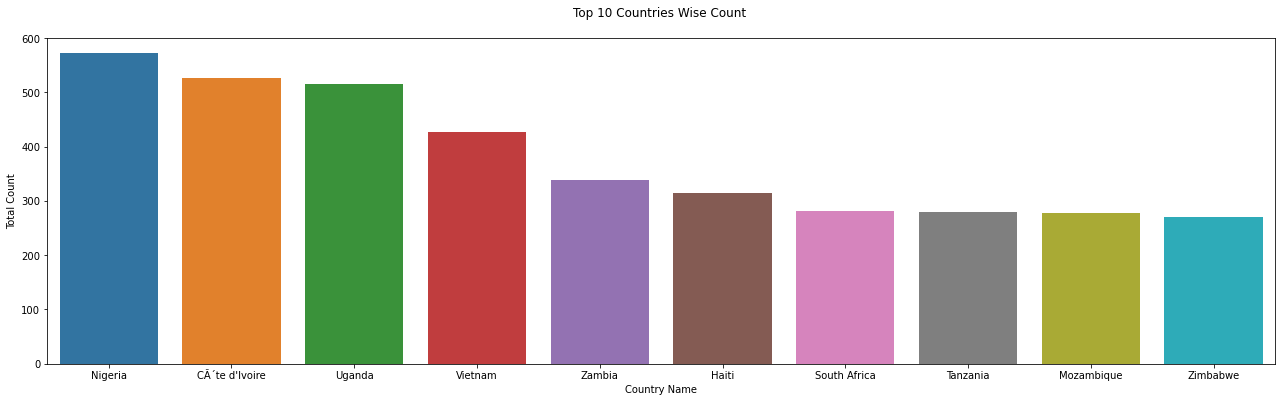

In [19]:
data =data.dropna()
ItemCount = data["Country"].value_counts().nlargest(10)
print("\033[1m"+"Top 10 Countries Wise Count \n"+"\033[0m")
print(ItemCount)

plt.figure(figsize=(22,6))
sns.countplot(data['Country'],order = data['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

# Total Pack Price for Top 15 Countries with graph

Total Pack Price for Top 15 Countries

Country
Vietnam                      8,903.75
Uganda                       7,858.41
Nigeria                      6,813.85
CÃ´te d'Ivoire               6,588.52
Tanzania                     3,563.00
Haiti                        3,149.19
Rwanda                       2,977.08
Zambia                       2,811.54
Mozambique                   2,640.30
Zimbabwe                     2,196.80
Guyana                       1,646.91
South Africa                 1,466.45
Ethiopia                       960.26
Congo, DRC                     858.05
Guatemala                      569.15
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

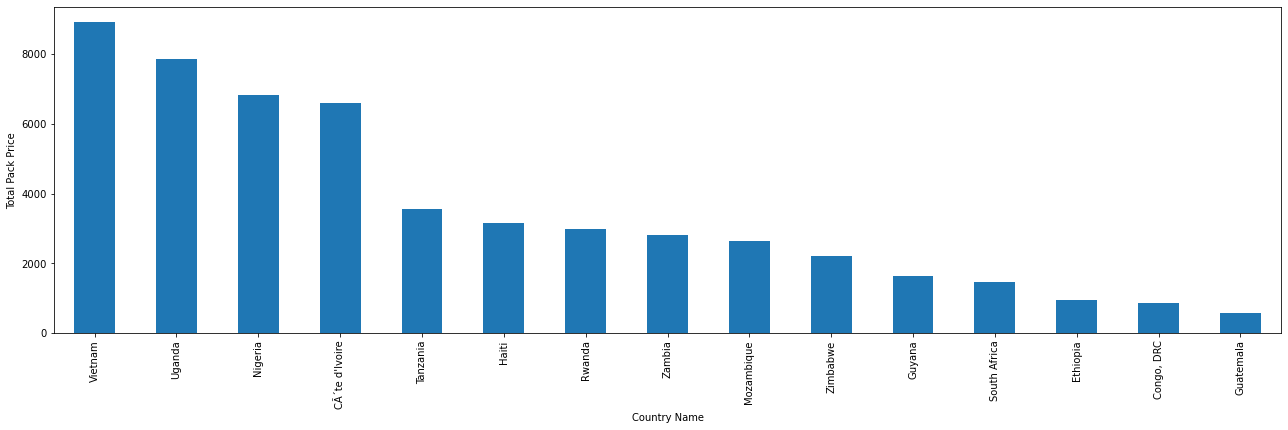

In [20]:
TotalPrice = data.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("\033[1m"+"Total Pack Price for Top 15 Countries\n"+"\033[0m")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=data.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

# First Line Designation Wise Count

First Line Designation Count 

Yes    4570
Name: First Line Designation, dtype: int64


C:\Users\puja_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'First Line Designation')

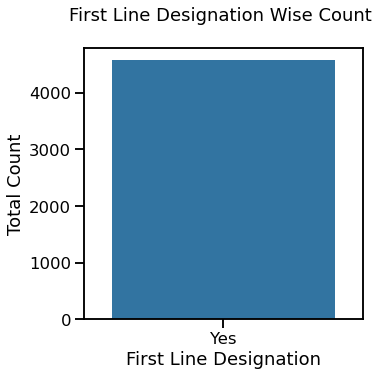

In [21]:
ItemCount1 = data["First Line Designation"].value_counts()
print("\033[1m"+"First Line Designation Count \n"+"\033[0m")
print(ItemCount1)

sns.set_context("talk",font_scale=1)
plt.figure(figsize=(5,5))
sns.countplot(data['First Line Designation'],order = data['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

# Shipment Mode percentage wise Pie Chart


In [24]:
ItemCount2 = data["Shipment Mode"].value_counts()
print("\033[1m"+"Shipment Mode Count \n"+"\033[0m")
print(ItemCount2)

ShippingMode = data["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

Shipment Mode Count 

Air            2728
Truck          1140
Air Charter     423
Ocean           279
Name: Shipment Mode, dtype: int64


# Unquie Manufacturing Site Names

In [25]:
UniqueItem = data['Manufacturing Site'].unique()
print("\033[1m" + "All Unique Manufacturing Site \n" + "\033[0m")
print(UniqueItem)
UniqueItem1 = data['Manufacturing Site'].nunique()
print("\033[1m" + "\nNumber of Unique Manufacturing Site \n" + "\033[0m")
print(UniqueItem1)


All Unique Manufacturing Site 

['Aurobindo Unit III, India' 'ABBVIE Ludwigshafen Germany'
 'Gilead(Nycomed) Oranienburg DE' 'Ranbaxy, Paonta Shahib, India'
 'Mylan (formerly Matrix) Nashik' 'BMS Meymac, France'
 'Novartis Pharma AG, Switzerland' 'Ipca Dadra/Nagar Haveli IN'
 'MSD, Haarlem, NL' 'Gland Pharma Ltd Pally Factory' 'Cipla, Goa, India'
 'ABBVIE (Abbott) Logis. UK' 'Hetero Unit III Hyderabad IN'
 'ABBVIE (Abbott) France' 'Aspen-OSD, Port Elizabeth, SA'
 'Strides, Bangalore, India.' 'Novartis Pharma Suffern, USA' 'Roche Basel'
 'GSK Mississauga (Canada)' 'Micro Labs Ltd. (Brown & Burk), India'
 'Medopharm Malur Factory, INDIA'
 'Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ\x83Â¸nland, 0133, Oslo, Norway'
 'GSK Ware (UK)' 'MSD Manati, Puerto Rico, (USA)'
 'Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India'
 'MSD Elkton USA' 'Janssen-Cilag, Latina, IT' 'Aurobindo Unit VII, IN'
 'Micro labs, Verna, Goa, India' 'Mylan,  H-12 & H-13, India'
 'Hetero, Jadcherl

# Max, Min and Mean of Shipment mode

In [26]:
def Ocean():
    print("\033[1m"+"\n\nSelected Shipment Mode : Ocean \n and the following are the details:\n"+"\033[0m")
    ItemData_Ocean=data[data['Shipment Mode']=='Ocean']
    print ("The Max Ocean Shipment Mode is :",ItemData_Ocean['Unit of Measure (Per Pack)'].max())
    print ("The Min Ocean Shipment is :",ItemData_Ocean['Unit of Measure (Per Pack)'].min())
    print ("The Mean Ocean Shipment is :",round(ItemData_Ocean['Unit of Measure (Per Pack)'].mean(),2))
    return 0
#Ocean()
def Air():
    print("\033[1m"+"\n\nSelected Shipment Mode : Air \n and the following are the details:\n"+"\033[0m")
    ItemData_Air=data[data['Shipment Mode']=='Air']
    print ("The Max Air Shipment Mode is :",ItemData_Air['Unit of Measure (Per Pack)'].max())
    print ("The Min Air Shipment is :",ItemData_Air['Unit of Measure (Per Pack)'].min())
    print ("The Mean Ocean Shipment is :",round(ItemData_Air['Unit of Measure (Per Pack)'].mean(),2))
    print("Selected Shipment Mode : Air \n and the following are the details:\n")
    return 0
#Air()
def Truck():
    print("\033[1m"+"\n\nSelected Shipment Mode : Truck \n and the following are the details:\n"+"\033[0m")
    ItemData_Truck=data[data['Shipment Mode']=='Truck']
    print ("The Max Truck Shipment Mode is :", ItemData_Truck['Unit of Measure (Per Pack)'].max())
    print ("The Min Truck Shipment is :",ItemData_Truck['Unit of Measure (Per Pack)'].min())
    print ("The Mean Truck Shipment is :", round(ItemData_Truck['Unit of Measure (Per Pack)'].mean(),2))
    print("Selected Shipment Mode : Truck \n and the following are the details:\n")
    return 0
#Truck()
def Air_Charter():
    print("\033[1m"+"\n\nSelected Shipment Mode : Air Charter \n and the following are the details:\n"+"\033[0m")
    ItemData_AirCharter=data[data['Shipment Mode']=='Air Charter']
    print ("The Max Air Charter Shipment Mode is :",ItemData_AirCharter['Unit of Measure (Per Pack)'].max())
    print ("The Min Air Charter Shipment is :",ItemData_AirCharter['Unit of Measure (Per Pack)'].min())
    print ("The Mean Air Charter Shipment is :", round((ItemData_AirCharter['Unit of Measure (Per Pack)'].mean()),2))
    print("Selected Shipment Mode : Air Charter \n and the following are the details:\n")
    return 0
#Air_Charter()

print(" 1 -> Ocean \n 2 -> Air Charter \n 3 -> Air \n 4 -> Truck")
print(" Enter Number for shipment mode :")
ItemData =int(input())
if(ItemData==1):
    Ocean()
elif(ItemData==2):
    Air_Charter()
elif(ItemData==3):
    Air()
elif(ItemData==4):
    Truck()
else:
    print("Invalid Choice")

 1 -> Ocean 
 2 -> Air Charter 
 3 -> Air 
 4 -> Truck
 Enter Number for shipment mode :
3


Selected Shipment Mode : Air 
 and the following are the details:

The Max Air Shipment Mode is : 1000
The Min Air Shipment is : 5
The Mean Ocean Shipment is : 91.04
Selected Shipment Mode : Air 
 and the following are the details:



In [27]:
    ItemData_Ocean=data[data['Shipment Mode']=='Ocean']
    ItemData_Air=data[data['Shipment Mode']=='Air']
    ItemData_Truck=data[data['Shipment Mode']=='Truck']
    ItemData_AirCharter=data[data['Shipment Mode']=='Air Charter']


# Graphical Representation of mean of Shipment mode

C:\Users\puja_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



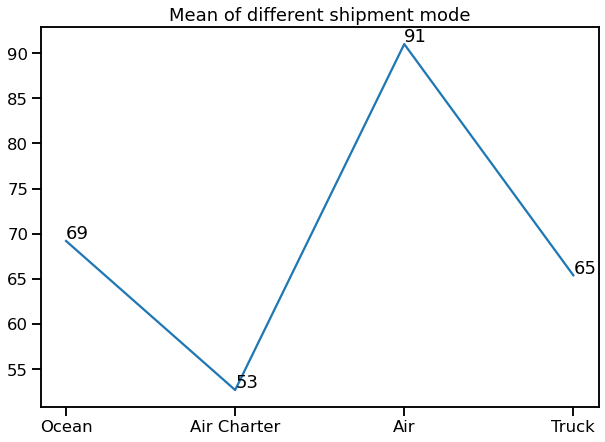

In [28]:
ItemTypeMean_A = round(ItemData_Air['Unit of Measure (Per Pack)'].mean(),1)
ItemTypeMean_T = round(ItemData_Truck['Unit of Measure (Per Pack)'].mean(),1)
ItemTypeMean_AC = round(ItemData_AirCharter['Unit of Measure (Per Pack)'].mean(),1)
ItemTypeMean_O = round(ItemData_Ocean['Unit of Measure (Per Pack)'].mean(),1)
fig,axes= plt.subplots(figsize = (10,7))
x=["Ocean","Air Charter", "Air", "Truck"]
y=[ItemTypeMean_O,ItemTypeMean_AC,ItemTypeMean_A,ItemTypeMean_T]
ax = sns.lineplot(x, y, sort = False)
ax.set_title("Mean of different shipment mode")

for x,y in zip(x,y):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

plt.show()

# Top 10 Manufacturing Site for all Shipment Mode with Graph

Manufacturing Site
Aurobindo Unit III, India         1577
Mylan (formerly Matrix) Nashik     887
Hetero Unit III Hyderabad IN       484
Cipla, Goa, India                  353
Strides, Bangalore, India.         315
ABBVIE Ludwigshafen Germany        265
ABBVIE (Abbott) Logis. UK          120
Aurobindo Unit VII, IN              77
Aspen-OSD, Port Elizabeth, SA       75
MSD, Haarlem, NL                    62
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

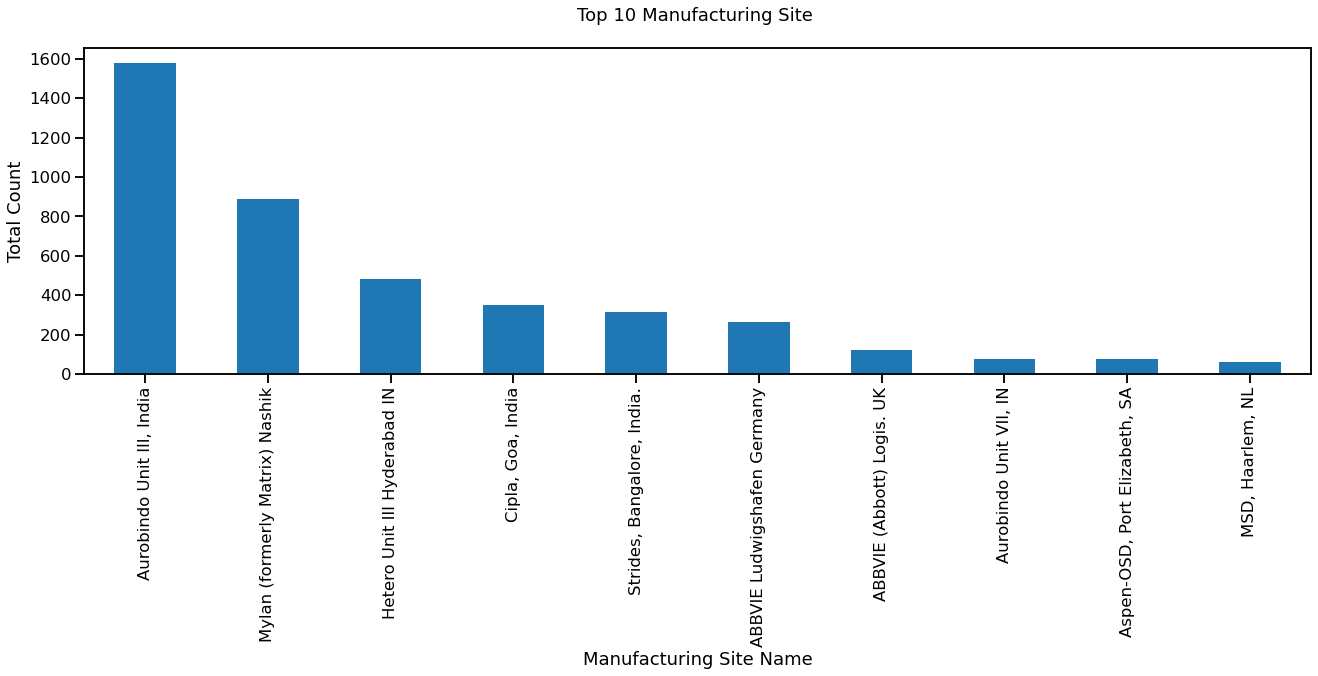

In [29]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=data.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

# Top 10 Manufacturing Site for Air Shipment Mode with Graph

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         986
Mylan (formerly Matrix) Nashik    436
ABBVIE Ludwigshafen Germany       233
Hetero Unit III Hyderabad IN      232
Cipla, Goa, India                 169
Strides, Bangalore, India.        152
ABBVIE (Abbott) Logis. UK         118
MSD, Haarlem, NL                   60
Aspen-OSD, Port Elizabeth, SA      59
BMS Meymac, France                 31
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

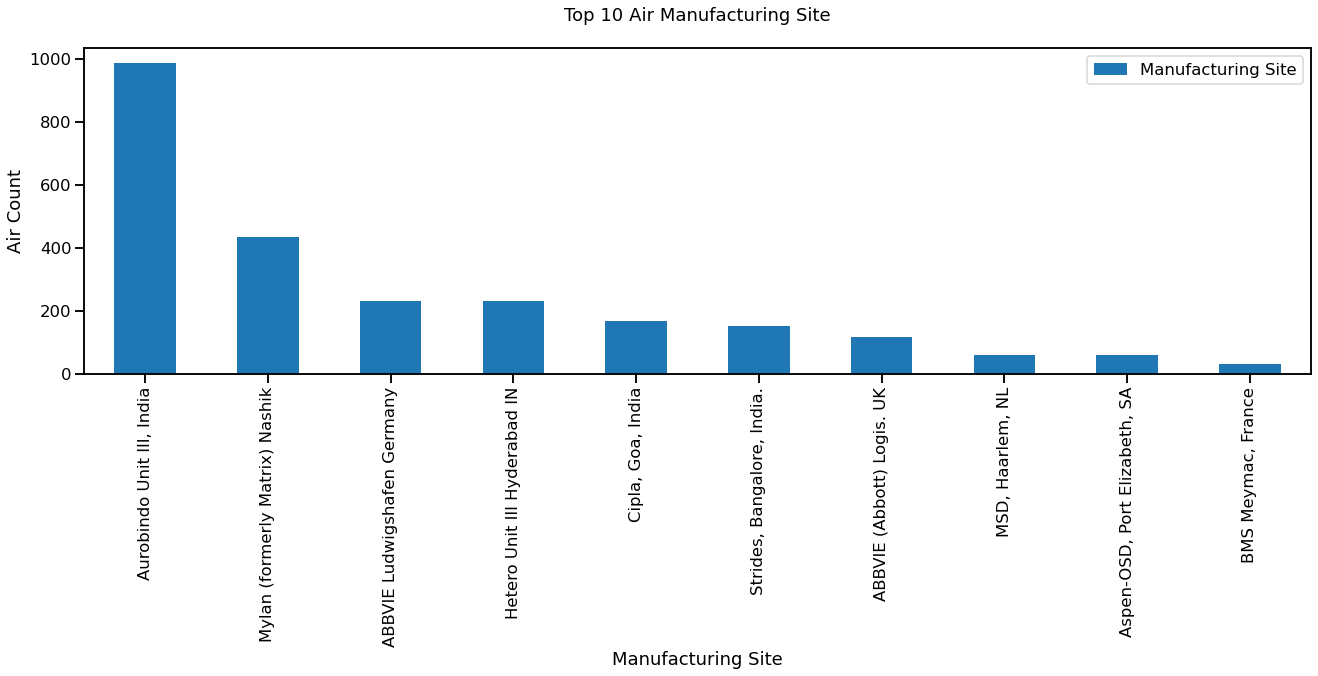

In [30]:
ItemData=data[data['Shipment Mode']=='Air']
data[data["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = data[data["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

# Top 10 Manufacturing Site for Truck Shipment Mode with Graph

Top 10 Truck Manufacturing Site 

Mylan (formerly Matrix) Nashik    307
Aurobindo Unit III, India         292
Hetero Unit III Hyderabad IN      188
Cipla, Goa, India                 118
Strides, Bangalore, India.        106
Aurobindo Unit VII, IN             41
ABBVIE Ludwigshafen Germany        21
Cipla, Patalganga, India           13
Hetero, Jadcherla, unit 5, IN      13
Cipla, Kurkumbh, India             11
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

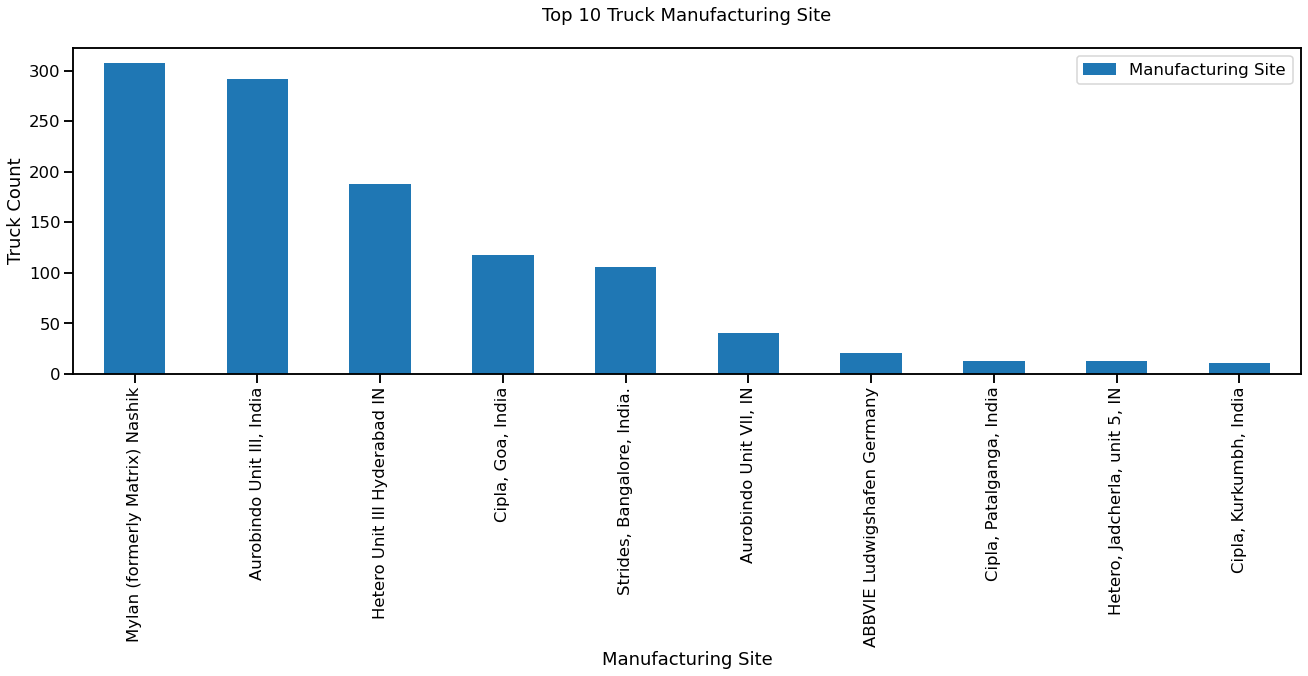

In [31]:
ItemData=data[data['Shipment Mode']=='Truck']
data[data["Shipment Mode"]=='Truck']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = data[data["Shipment Mode"]=='Truck']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Truck Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Truck Manufacturing Site\n')
plt.ylabel('Truck Count')
plt.xlabel('Manufacturing Site')

# Top 10 Manufacturing Site for Air Charter Shipment Mode with Graph

Top 10 Truck Manufacturing Site 

Aurobindo Unit III, India         165
Mylan (formerly Matrix) Nashik    115
Hetero Unit III Hyderabad IN       45
Strides, Bangalore, India.         32
Cipla, Goa, India                  26
Aspen-OSD, Port Elizabeth, SA      11
ABBVIE Ludwigshafen Germany         8
Aurobindo Unit VII, IN              8
Cipla, Kurkumbh, India              7
MSD, Haarlem, NL                    2
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

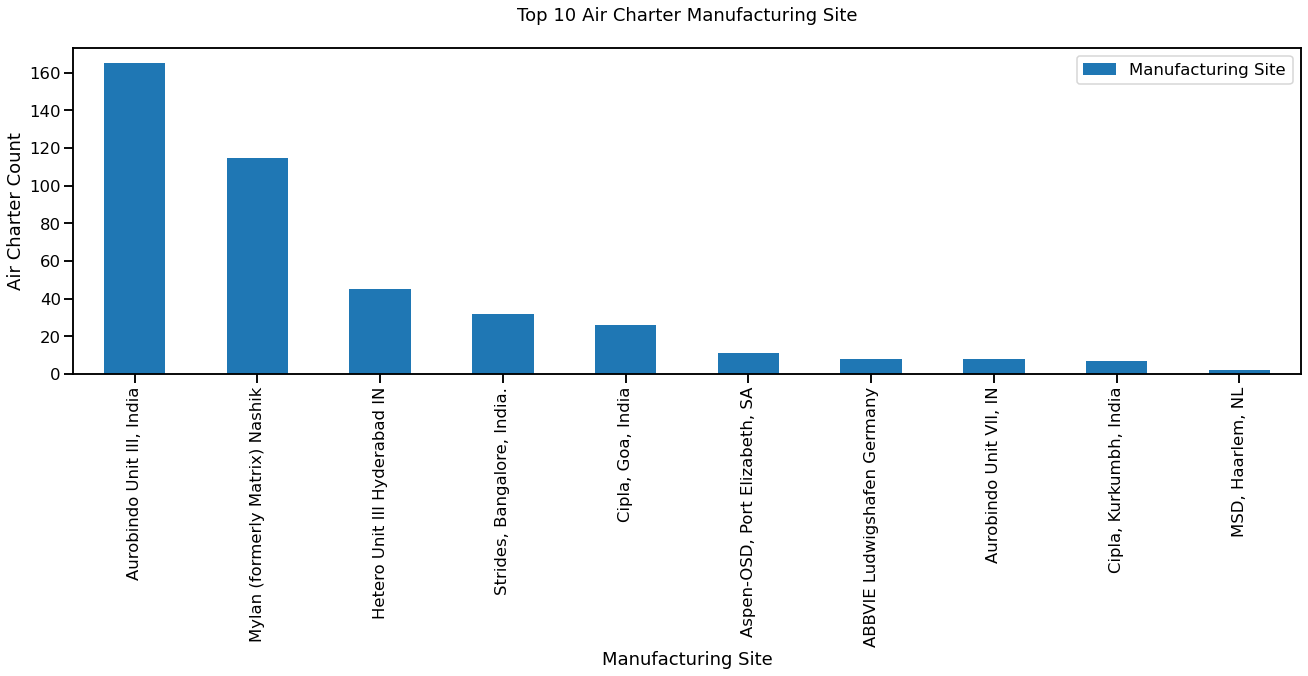

In [32]:
ItemData=data[data['Shipment Mode']=='Air Charter']
data[data["Shipment Mode"]=='Air Charter']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = data[data["Shipment Mode"]=='Air Charter']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Truck Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Charter Manufacturing Site\n')
plt.ylabel('Air Charter Count')
plt.xlabel('Manufacturing Site')

# Top 10 Manufacturing Site for Ocean Shipment Mode with Graph

Top 10 Ocean Manufacturing Site 

Aurobindo Unit III, India                                                   134
Cipla, Goa, India                                                            40
Mylan (formerly Matrix) Nashik                                               29
Strides, Bangalore, India.                                                   25
Hetero Unit III Hyderabad IN                                                 19
GSK Mississauga (Canada)                                                      9
Aurobindo Unit VII, IN                                                        6
Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India      5
Cipla Ltd A-42 MIDC Mahar. IN                                                 4
ABBVIE Ludwigshafen Germany                                                   3
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

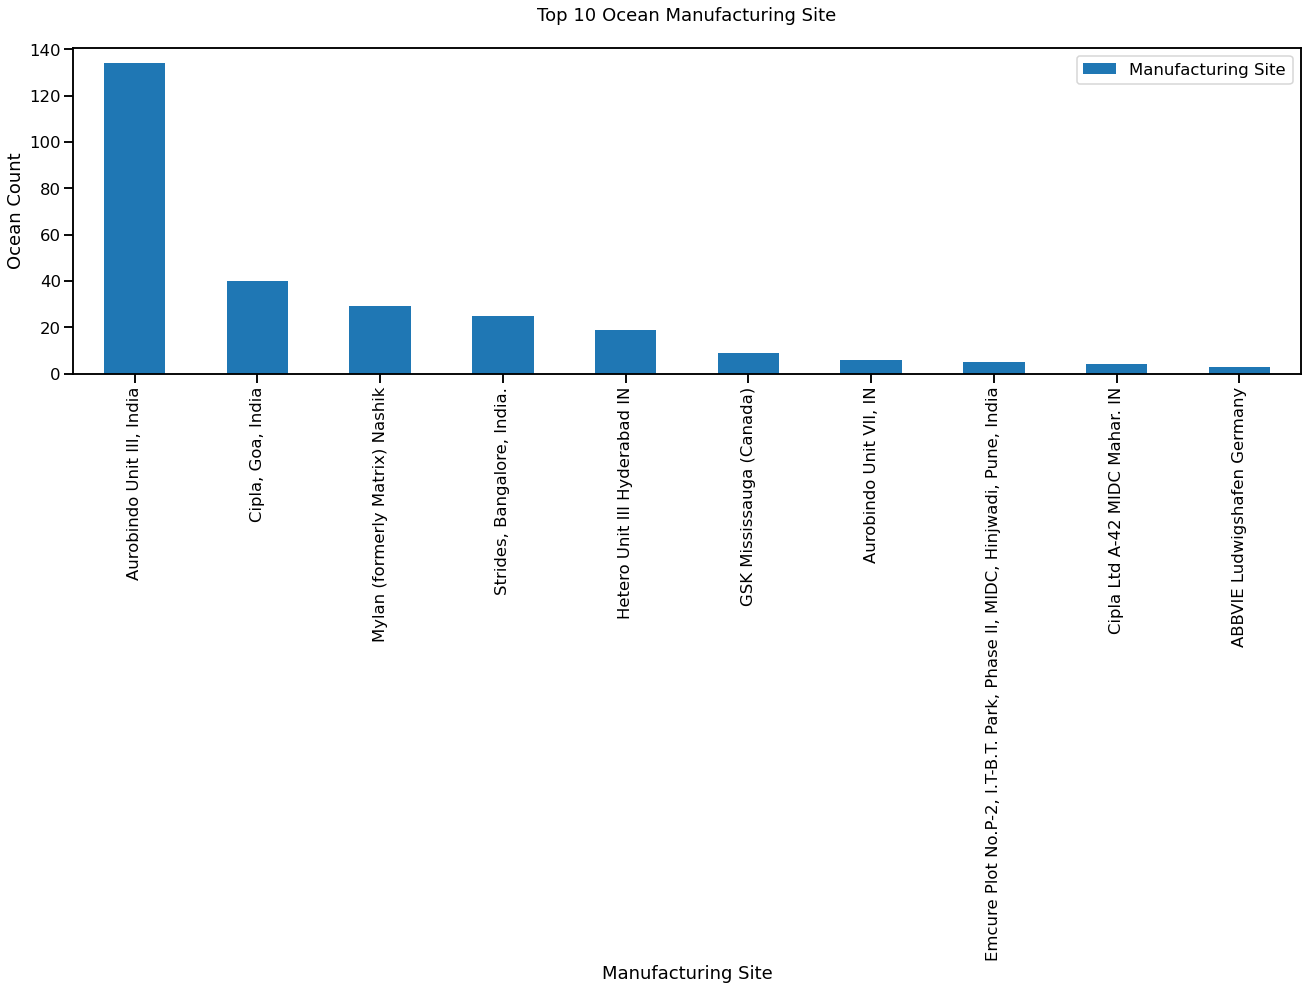

In [33]:
ItemData=data[data['Shipment Mode']=='Ocean']
data[data["Shipment Mode"]=='Ocean']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = data[data["Shipment Mode"]=='Ocean']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Ocean Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Ocean Manufacturing Site\n')
plt.ylabel('Ocean Count')
plt.xlabel('Manufacturing Site')

# Shipment Mode and Pack Price in Bar Plot Graph

C:\Users\puja_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



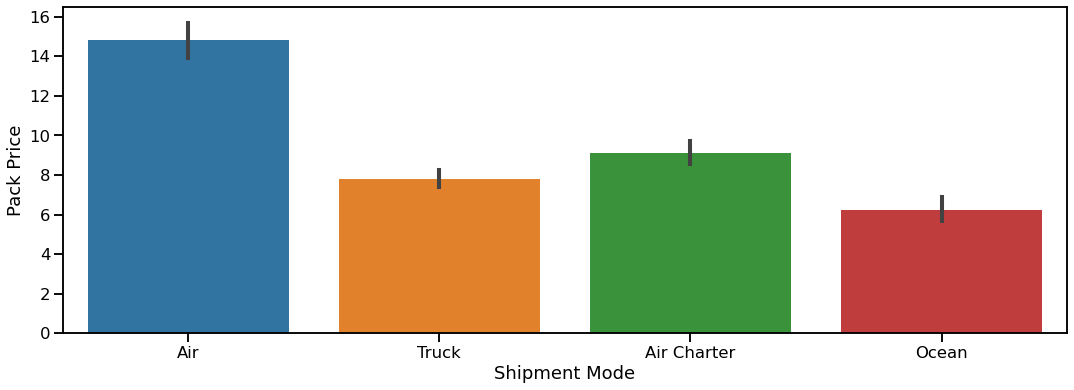

In [34]:
plt.subplots(figsize = (18,6))
#plt.xticks(rotation = 90)
sns.barplot('Shipment Mode','Pack Price', data = data)
plt.show()

# Fullfill Via

Fulfill Via Count 

From RDC       2875
Direct Drop    1695
Name: Fulfill Via, dtype: int64


C:\Users\puja_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Fulfill Via')

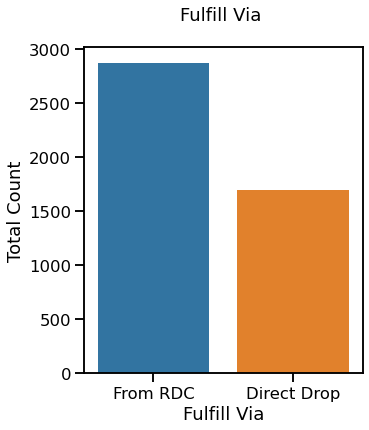

In [35]:
ItemCount3 = data["Fulfill Via"].value_counts()
print("\033[1m"+"Fulfill Via Count \n"+"\033[0m")
print(ItemCount3)

sns.set_context("talk",font_scale=1)
plt.figure(figsize=(5,6))
sns.countplot(data['Fulfill Via'],order = data['Fulfill Via'].value_counts().nlargest(10).index)
plt.title('Fulfill Via \n')
plt.ylabel('Total Count')
plt.xlabel('Fulfill Via')

# Vendor INCO Term Preferred

In [36]:
ItemCount4 = data["Vendor INCO Term"].value_counts()
print("\033[1m"+"Vendor INCO Term Count \n"+"\033[0m")
print(ItemCount4)

Vendor_INCO_Term = data["Vendor INCO Term"].value_counts()
labels = (np.array(Vendor_INCO_Term.index))
sizes = (np.array((Vendor_INCO_Term / Vendor_INCO_Term.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Vendor INCO Term")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Vendor INCO Term")

Vendor INCO Term Count 

N/A - From RDC    2875
EXW                903
FCA                340
DDP                295
CIP                152
DAP                  3
DDU                  2
Name: Vendor INCO Term, dtype: int64


# Product Group

In [37]:
ItemCount5 = data["Product Group"].value_counts()
print("\033[1m"+"Product Group Count \n"+"\033[0m")
print(ItemCount5)

Product_Group = data["Product Group"].value_counts()
labels = (np.array(Product_Group.index))
sizes = (np.array((Product_Group / Product_Group.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Product Group")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Product Group")

Product Group Count 

ARV     4539
ANTM      18
ACT       13
Name: Product Group, dtype: int64


# Sub Classification

In [38]:
ItemCount6 = data["Sub Classification"].value_counts()
print("\033[1m"+"Sub Classification Count \n"+"\033[0m")
print(ItemCount6)

Sub_Classification = data["Sub Classification"].value_counts()
labels = (np.array(Sub_Classification.index))
sizes = (np.array((Sub_Classification / Sub_Classification.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Sub Classification")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Sub_Classification")

Sub Classification Count 

Adult        3549
Pediatric     990
Malaria        18
ACT            13
Name: Sub Classification, dtype: int64


# All Unique Vendors

In [39]:
ItemCount7 = data["Vendor"].value_counts()
print("\033[1m"+"All Unique Vendors wise Count \n"+"\033[0m")
print(ItemCount7)

Unique_Vendor1 = data['Vendor'].nunique()
print("\033[1m" + "\nNumber of Unique Vendor \n" + "\033[0m")
print(Unique_Vendor1)


All Unique Vendors wise Count 

SCMS from RDC                                                        2875
Aurobindo Pharma Limited                                              488
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                       305
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                 239
HETERO LABS LIMITED                                                   176
CIPLA LIMITED                                                         147
STRIDES ARCOLAB LIMITED                                                80
MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.)      46
BRISTOL-MYERS SQUIBB                                                   32
EMCURE PHARMACEUTICALS LTD                                             31
ASPEN PHARMACARE                                                       28
MICRO LABS LIMITED                                                     24
Hoffmann-La Roche ltd Basel                                            19
GLAXOS

# Top 3 Vendors

C:\Users\puja_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Vendor ')

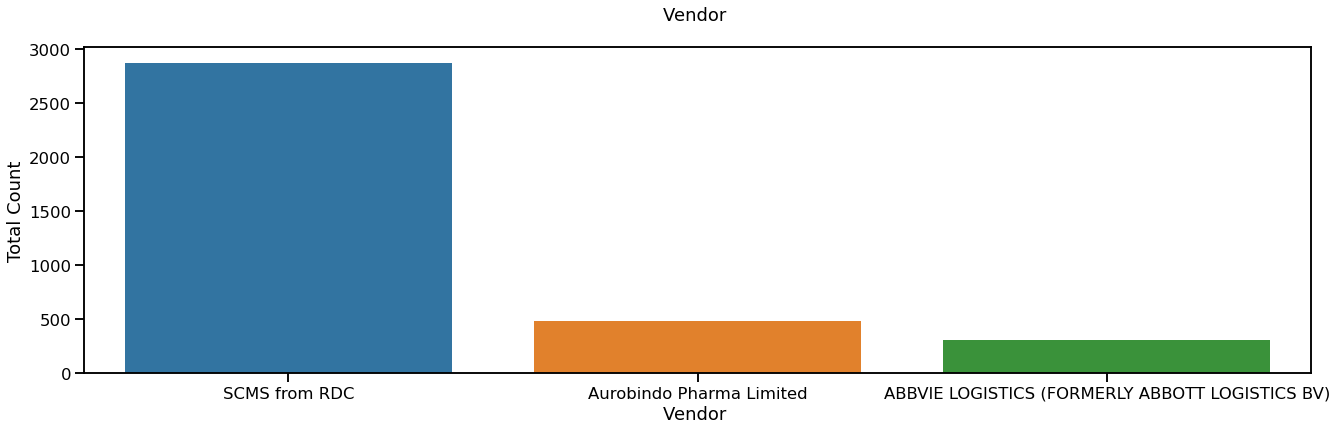

In [40]:
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))

sns.countplot(data['Vendor'],order = data['Vendor'].value_counts().nlargest(3).index)

plt.title('Vendor \n')
plt.ylabel('Total Count')
plt.xlabel('Vendor ')

# Molecule/Test Type

In [41]:
ItemCount8 = data["Molecule/Test Type"].value_counts()
print("\033[1m"+"All Unique Molecule/Test Type wise Count \n"+"\033[0m")
print(ItemCount8)
Unique_MoleculeTestType1 = data['Molecule/Test Type'].nunique()
print("\033[1m" + "\n Number of Unique Molecule/Test Type \n" + "\033[0m")
print(Unique_MoleculeTestType1)

All Unique Molecule/Test Type wise Count 

Efavirenz                                                534
Nevirapine                                               489
Lamivudine/Nevirapine/Zidovudine                         444
Lopinavir/Ritonavir                                      401
Lamivudine/Zidovudine                                    362
Lamivudine                                               265
Zidovudine                                               247
Lamivudine/Tenofovir Disoproxil Fumarate                 205
Abacavir                                                 196
Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate       187
Tenofovir Disoproxil Fumarate                            179
Lamivudine/Nevirapine/Stavudine                          154
Emtricitabine/Tenofovir Disoproxil Fumarate              140
Didanosine                                               114
Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate    102
Stavudine                                 

# Top 3 Molecule/Test Type

C:\Users\puja_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Molecule/Test Type ')

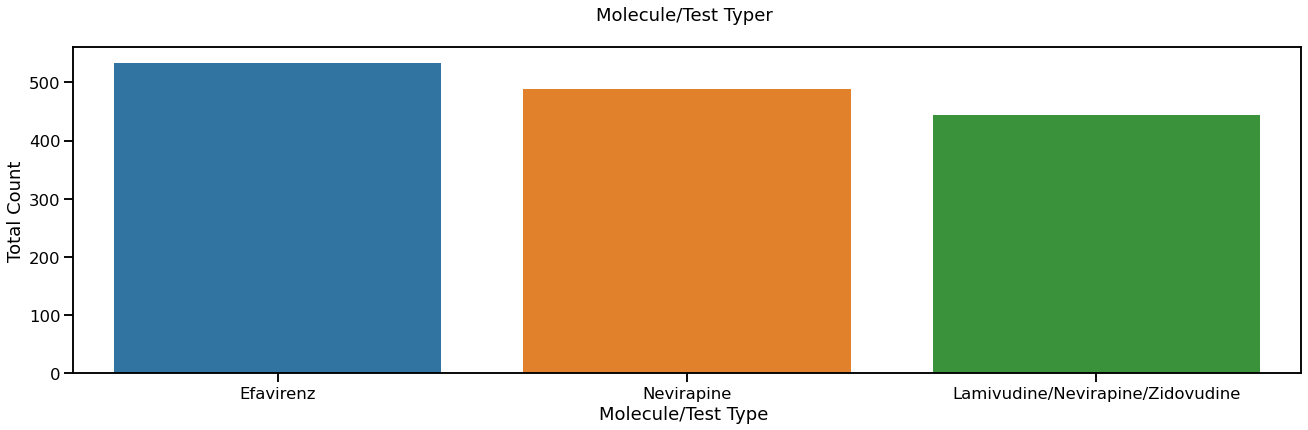

In [42]:
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))

sns.countplot(data['Molecule/Test Type'],order = data['Molecule/Test Type'].value_counts().nlargest(3).index)

plt.title('Molecule/Test Typer \n')
plt.ylabel('Total Count')
plt.xlabel('Molecule/Test Type ')

# Unique Brands

In [43]:
ItemCount9 = data["Brand"].value_counts()
print("\033[1m"+"All Unique Brand wise Count \n"+"\033[0m")
print(ItemCount9)

Unique_Brand1 = data['Brand'].nunique()
print("\033[1m" + "\n Number of Unique Brand \n" + "\033[0m")
print(Unique_Brand1)

All Unique Brand wise Count 

Generic            3968
Aluvia              166
Kaletra              88
Norvir               79
Truvada              56
Videx                33
Stocrin/Sustiva      27
Invirase             19
Prezista             19
Crixivan             17
Viread               13
Ziagen               13
Intelence            13
Videx EC             12
Isentress            12
Coartem              11
Atripla              10
Reyataz               5
Trizivir              5
Viracept              3
Retrovir              1
Name: Brand, dtype: int64

 Number of Unique Brand 

21


# Top 3 Brands

C:\Users\puja_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Brand ')

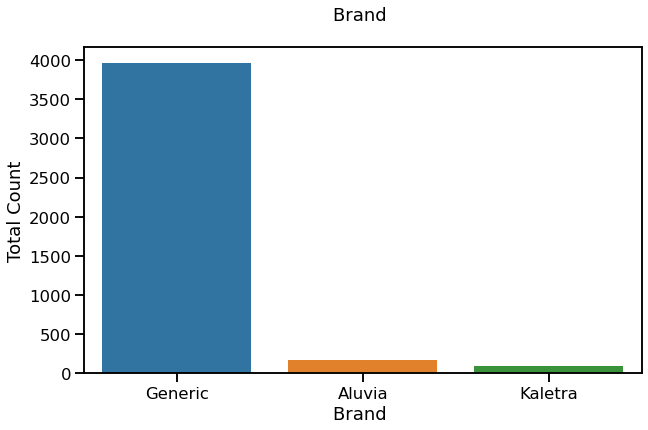

In [44]:
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(10,6))

sns.countplot(data['Brand'],order = data['Brand'].value_counts().nlargest(3).index)

plt.title('Brand \n')
plt.ylabel('Total Count')
plt.xlabel('Brand ')

# Dosage Form

In [45]:
ItemCount10 = data["Dosage Form"].value_counts()
print("\033[1m"+"All Unique Dosage Form wise Count \n"+"\033[0m")
print(ItemCount10)
Unique_Dosage_Form1 = data['Dosage Form'].nunique()
print("\033[1m" + "\n Number of Dosage Form \n" + "\033[0m")
print(Unique_Dosage_Form1)

All Unique Dosage Form wise Count 

Tablet                                1887
Tablet - FDC                          1636
Oral solution                          323
Capsule                                269
Chewable/dispersible tablet - FDC      152
Oral suspension                        127
Chewable/dispersible tablet             87
Delayed-release capsules                48
Tablet - FDC + blister                  14
Delayed-release capsules - blister      12
Tablet - FDC + co-blister                8
Injection                                3
Powder for oral solution                 2
Tablet - blister                         1
Oral powder                              1
Name: Dosage Form, dtype: int64

 Number of Dosage Form 

15


In [46]:
DosageForm = data["Dosage Form"].value_counts()
labels = (np.array(DosageForm.index))
sizes = (np.array((DosageForm / DosageForm.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Dosage Form")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="DosageForm")

In [47]:
data.dtypes

ï»¿Project Code                  object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64
Line Item Value                 float64
Pack Price                      float64


In [48]:
data["Weight (Kilograms)"] =pd.to_numeric(data["Weight (Kilograms)"])
data["Freight Cost (USD)"] =pd.to_numeric(data["Freight Cost (USD)"])
data["Scheduled Delivery Date"] = pd.to_datetime(data["Scheduled Delivery Date"])
order=data["PO / SO #"].nunique() #5572 orders
order=data["PO / SO #"].count() #6175 orders
total_projects = data["ï»¿Project Code"].nunique() #130
total_Freight_Cost= data["Freight Cost (USD)"].sum() #68687760.27
avg_Freight_Cost= total_Freight_Cost/order #12327.308016870064
country_summary = data.groupby("Country").sum().reset_index()
data.head()

,ï»¿Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
21,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,7/4/2007,2007-10-15,15-Oct-07,15-Oct-07,ARV,Pediatric,Aurobindo Pharma Limited,Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,"1,920.00",1.92,0.01,"Aurobindo Unit III, India",Yes,941,"4,193.49",3.07
22,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,7/4/2007,2007-08-27,27-Aug-07,27-Aug-07,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,500,"41,095.00",82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,"1,767.38",65.75
28,117-ET-T01,Pre-PQ Process,SCMS-11070,ASN-916,Ethiopia,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,10/3/2007,2007-11-20,20-Nov-07,20-Nov-07,ARV,Adult,Aurobindo Pharma Limited,Stavudine,Generic,30mg,Capsule,60,64000,"99,200.00",1.55,0.03,"Aurobindo Unit III, India",Yes,4228,"12,237.61",158.72
31,108-VN-T01,Pre-PQ Process,SCMS-14190,ASN-1192,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,11/19/2007,2008-01-21,21-Jan-08,21-Jan-08,ARV,Adult,"GILEAD SCIENCES IRELAND, INC.",Tenofovir Disoproxil Fumarate,Viread,300mg,Tablet,30,1000,"17,000.00",17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,"2,282.57",27.20
32,108-VN-T01,Pre-PQ Process,SCMS-14200,ASN-1171,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,11/21/2007,2008-01-21,21-Jan-08,21-Jan-08,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,Zidovudine,Generic,300mg,Tablet,60,400,"3,352.00",8.38,0.14,"Ranbaxy, Paonta Shahib, India",Yes,23,"2,149.05",5.36


In [49]:
country_summary.columns


Index(['Country', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)'],
      dtype='object')

# Frieght cost by shipment by country order

In [50]:
country_summary = country_summary[["Country","Freight Cost (USD)"]]
country_summary = data.groupby(["Country","Shipment Mode"]).sum().reset_index()
country_summary = country_summary[["Country","Shipment Mode","Freight Cost (USD)"]]
country_summary = data.groupby(["Country","Shipment Mode"]).agg({"PO / SO #":"count","Freight Cost (USD)":"sum"}).reset_index()
country_summary["frt_cst_shipment_per_country_usd_order"] = country_summary["Freight Cost (USD)"]/country_summary["PO / SO #"]
country_summary.head()

,Country,Shipment Mode,PO / SO #,Freight Cost (USD),frt_cst_shipment_per_country_usd_order
0,Afghanistan,Air,2,"1,081.05",540.52
1,Angola,Air,3,"7,444.07","2,481.36"
2,Benin,Air,5,"58,191.29","11,638.26"
3,Botswana,Air,3,"64,577.69","21,525.90"
4,Burundi,Air,32,"110,871.31","3,464.73"


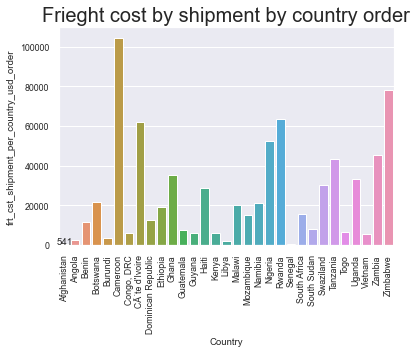

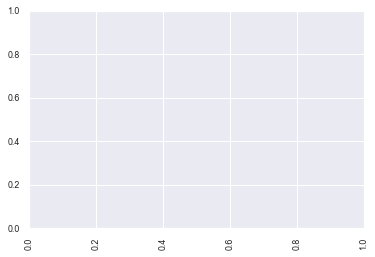

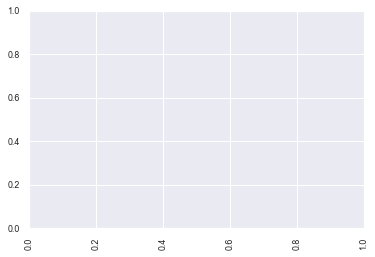

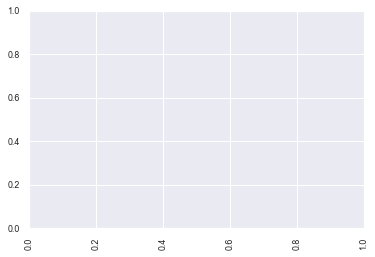

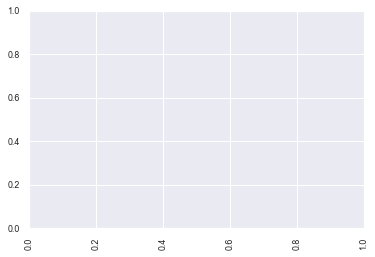

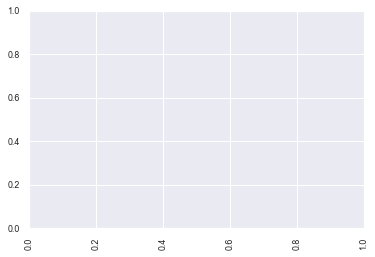

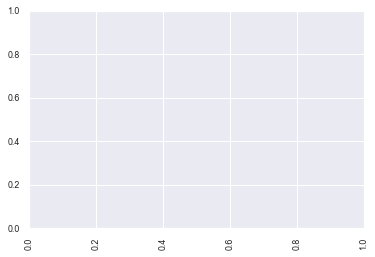

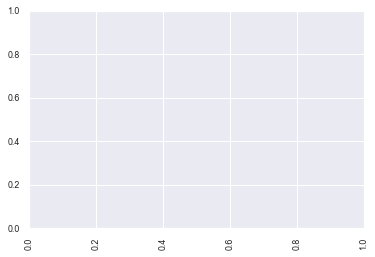

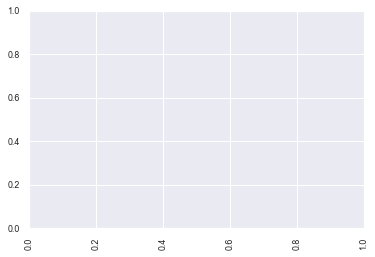

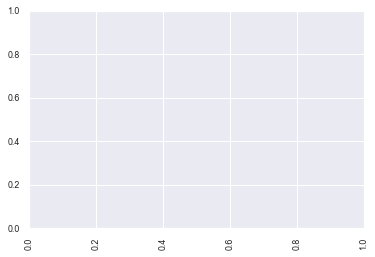

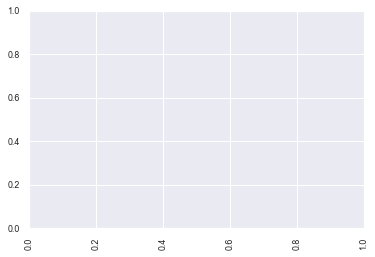

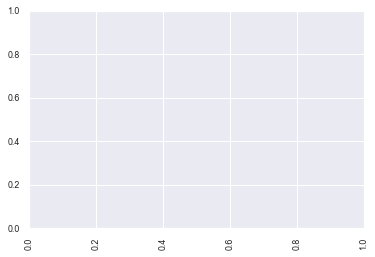

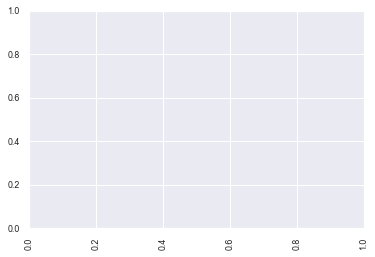

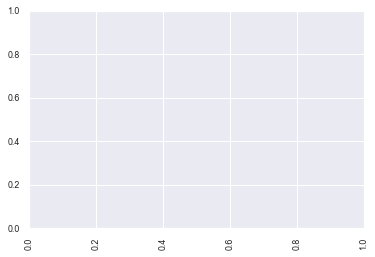

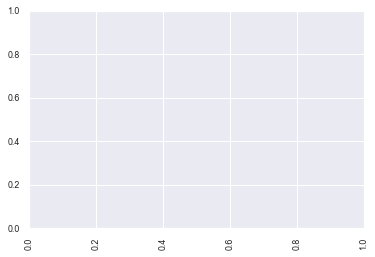

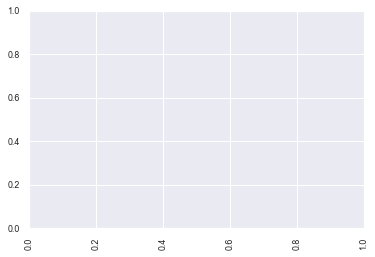

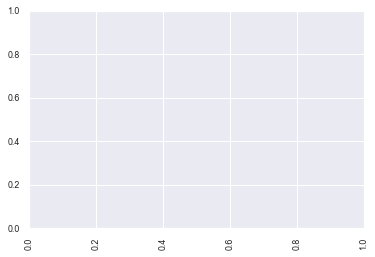

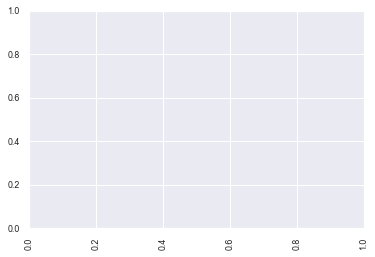

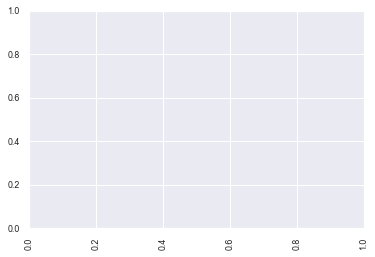

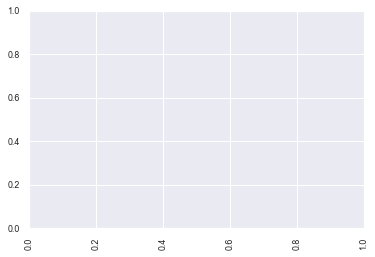

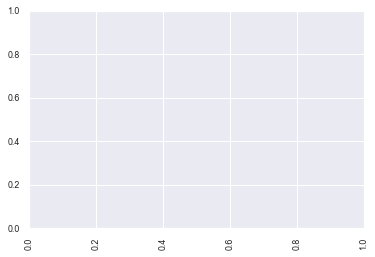

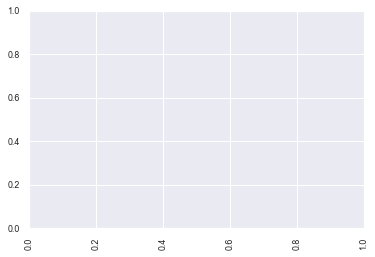

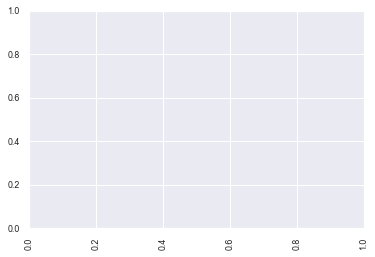

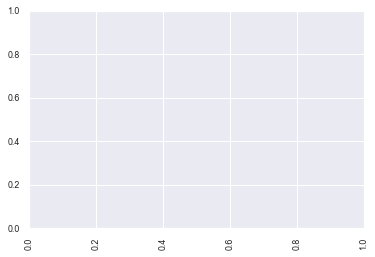

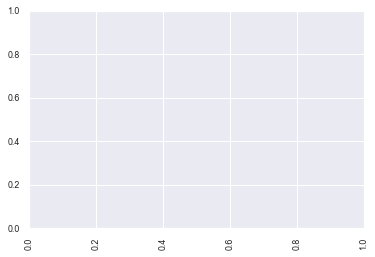

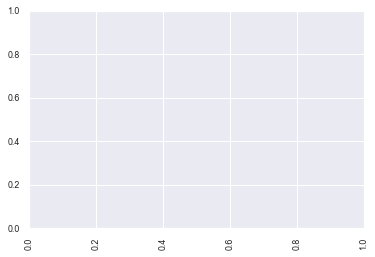

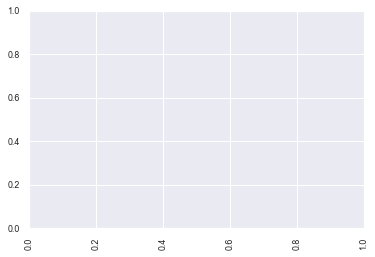

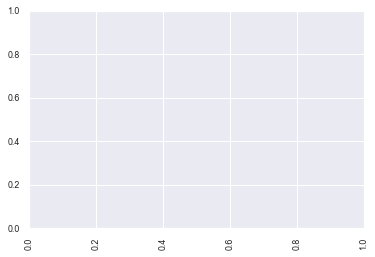

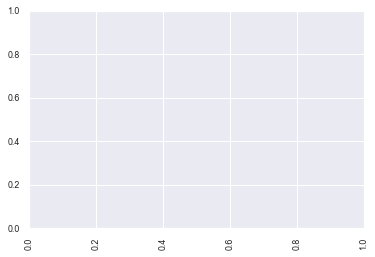

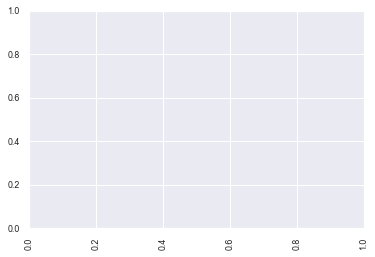

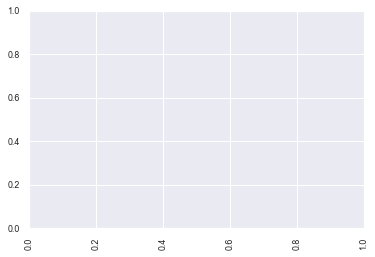

In [51]:
sns.set(font_scale=0.8, palette = "dark")
ax = sns.barplot(data=country_summary, x = "Country", y="frt_cst_shipment_per_country_usd_order" , ci = None, estimator = sum )
plt.title("Frieght cost by shipment by country order", fontsize = 20)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+10, ha="center", s="{:.0f}".format(height))
    plt.xticks(rotation ="vertical")
    plt.show()

# Frieght cost by shipment by Shipment mode

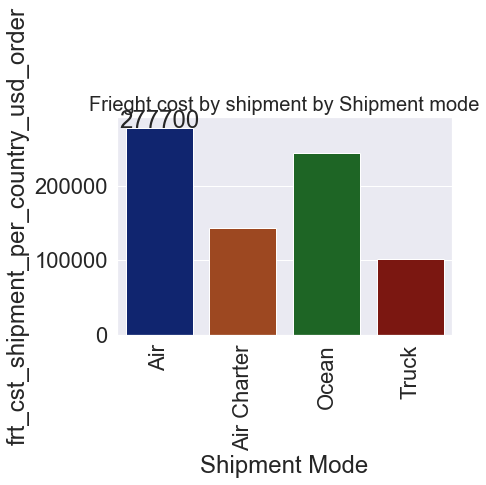

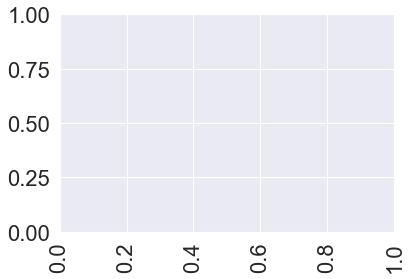

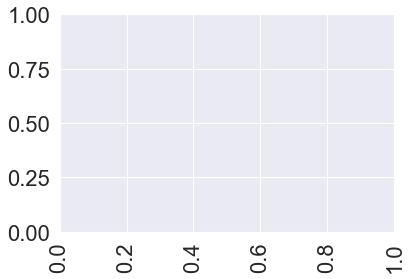

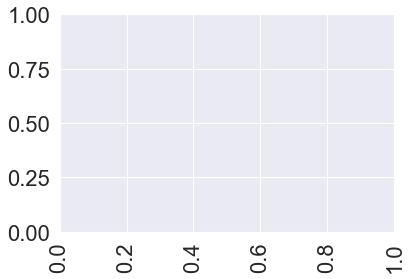

In [52]:

sns.set(font_scale=2, palette = "dark")
ax = sns.barplot(data=country_summary, x = "Shipment Mode", y="frt_cst_shipment_per_country_usd_order" , ci = None, estimator = sum )
plt.title("Frieght cost by shipment by Shipment mode", fontsize = 20)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+10, ha="center", s="{:.0f}".format(height))
    plt.xticks(rotation ="vertical")
    plt.show()

# total freight cost for top 10 country

In [53]:
totalfreight= data.groupby(["Country"])["Freight Cost (USD)"].sum().nlargest(10)
totalfreight.head()

Country
Nigeria                  9,819,252.74
Uganda                   5,065,491.84
CÃ´te d'Ivoire           4,507,695.61
Rwanda                   4,033,630.92
Zambia                   3,763,555.63
Name: Freight Cost (USD), dtype: float64

In [54]:
# mf is manufacturing
mf_summary = data.groupby("Manufacturing Site").count().reset_index()
mf_summary.head()

,Manufacturing Site,ï»¿Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,ABBVIE (Abbott) France,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,ABBVIE (Abbott) Logis. UK,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
2,ABBVIE (Abbott) St. P'burg USA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,ABBVIE Ludwigshafen Germany,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265
4,"Aspen-OSD, Port Elizabeth, SA",75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75


In [56]:
mf_summary = data.groupby(["Manufacturing Site"]).agg({"PO / SO #":"count","Freight Cost (USD)":"sum"}).reset_index()
mf_summary.head()


,Manufacturing Site,PO / SO #,Freight Cost (USD)
0,ABBVIE (Abbott) France,3,"15,087.73"
1,ABBVIE (Abbott) Logis. UK,120,"914,074.30"
2,ABBVIE (Abbott) St. P'burg USA,1,666.66
3,ABBVIE Ludwigshafen Germany,265,"1,742,321.56"
4,"Aspen-OSD, Port Elizabeth, SA",75,"415,837.04"


# Frieght cost by Manufacturing Site

C:\Users\puja_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 131 missing from current font.

C:\Users\puja_\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 131 missing from current font.



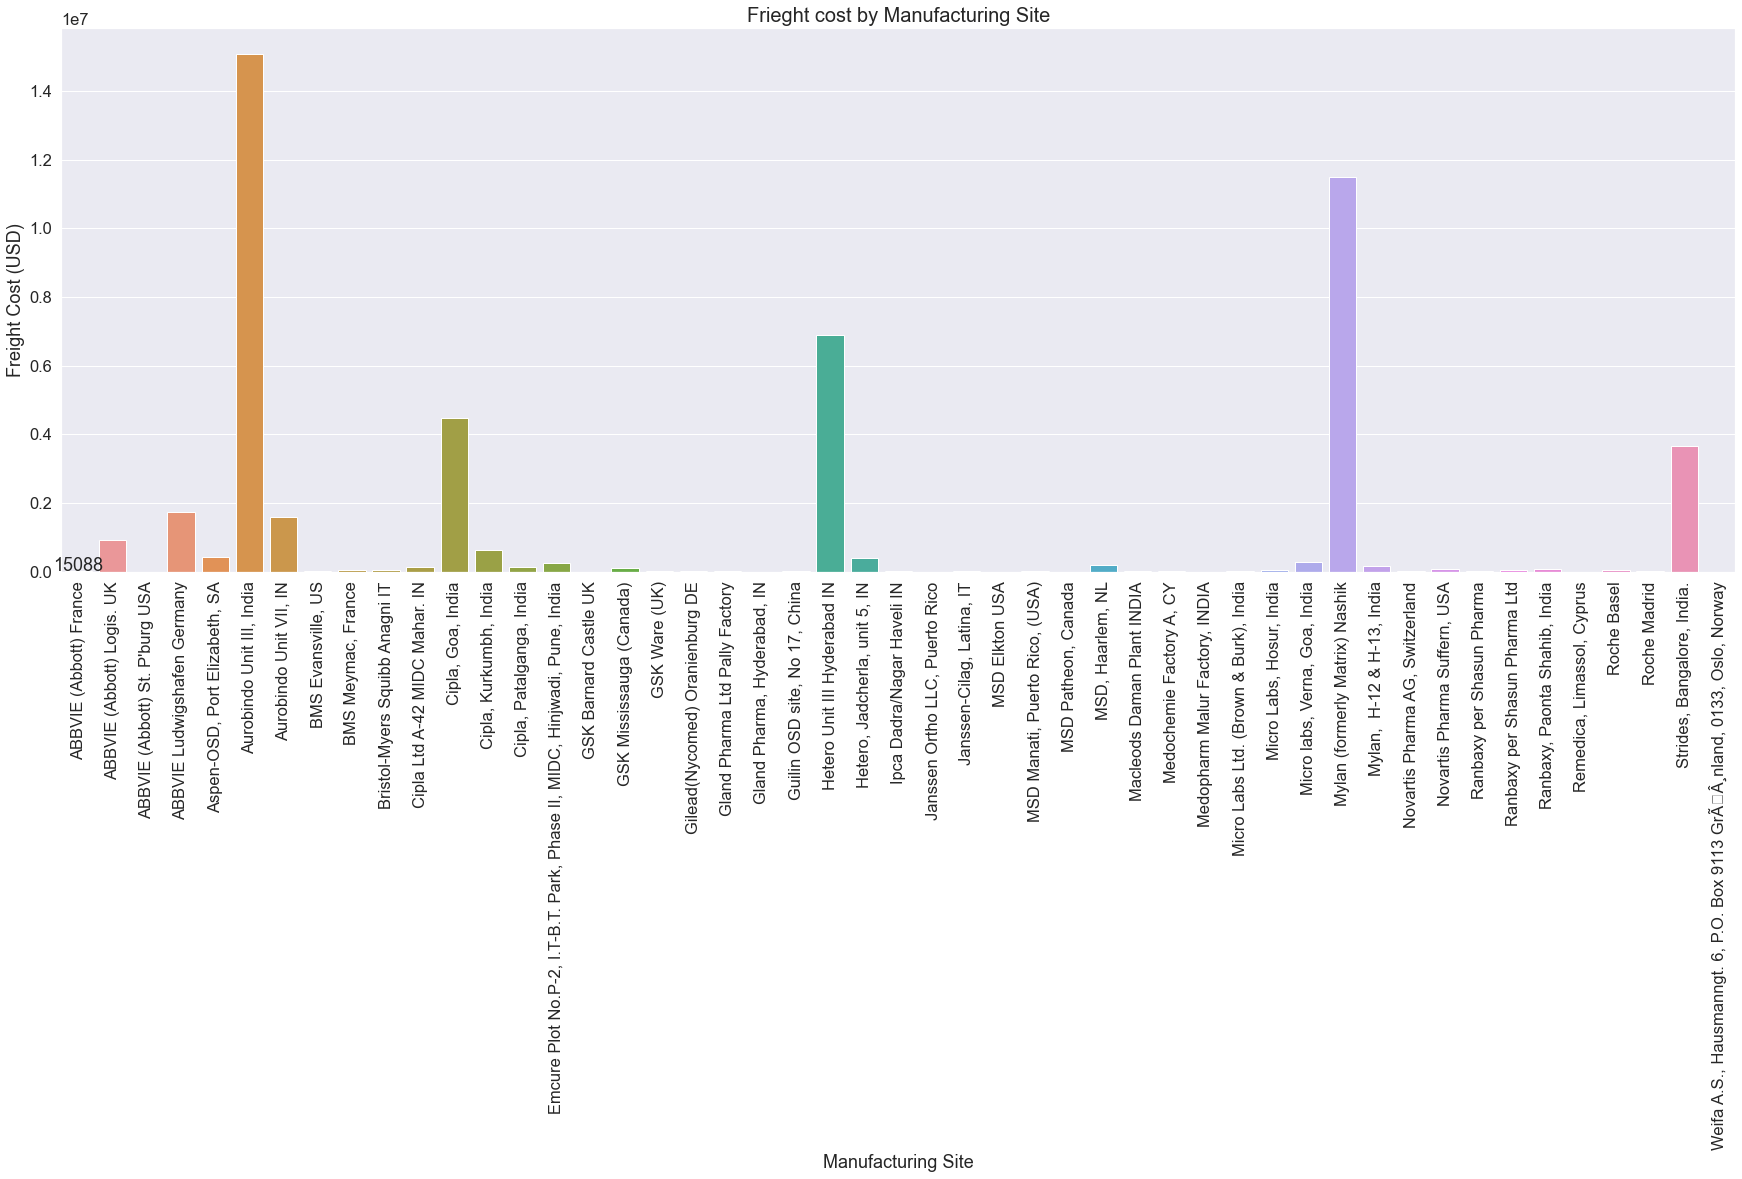

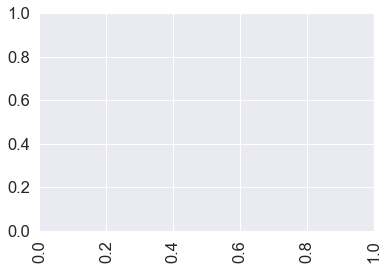

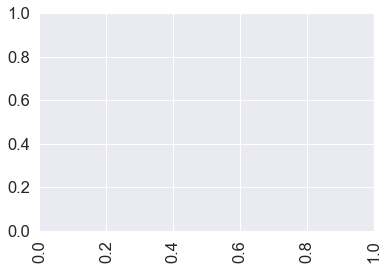

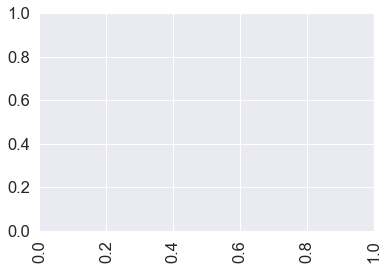

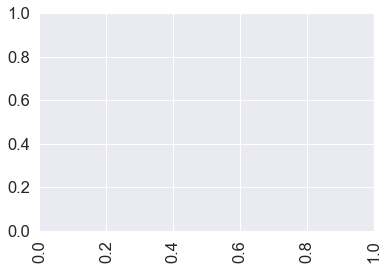

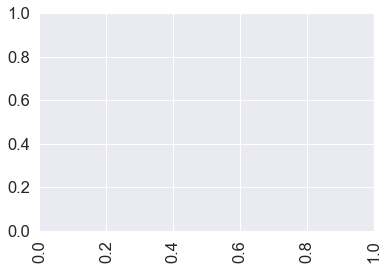

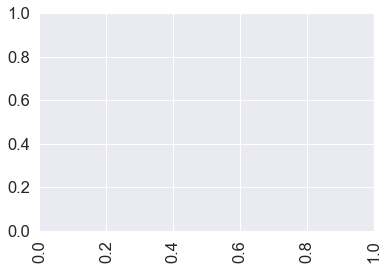

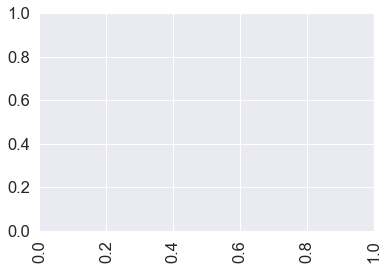

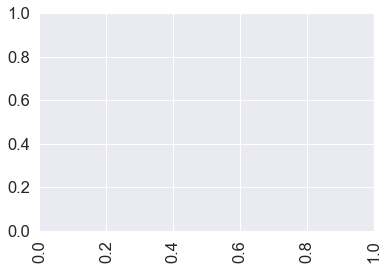

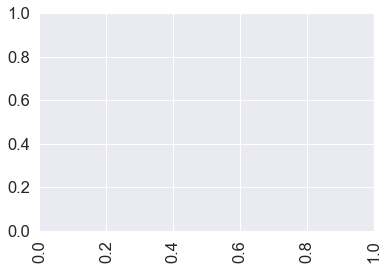

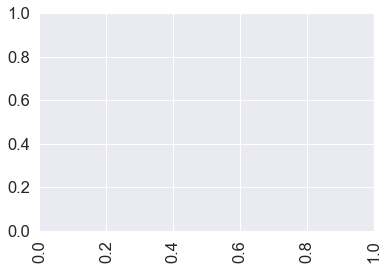

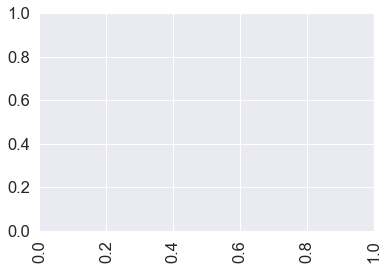

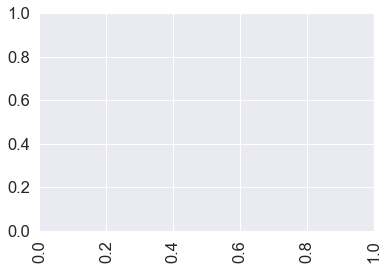

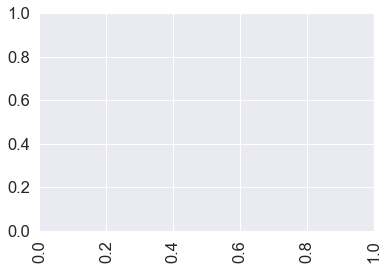

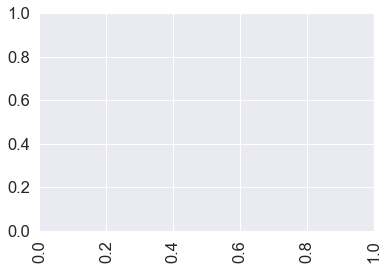

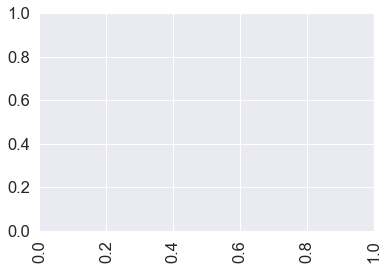

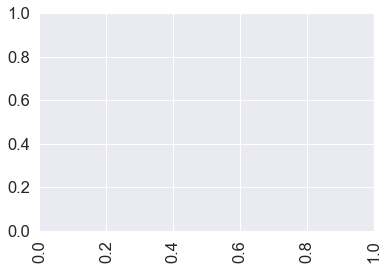

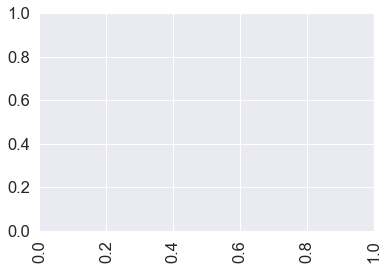

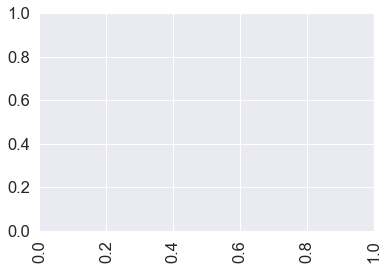

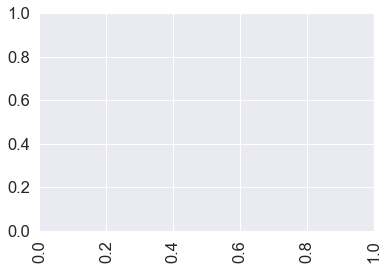

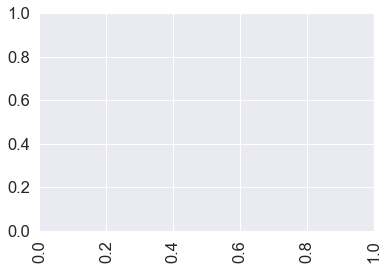

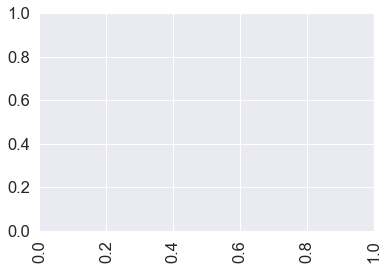

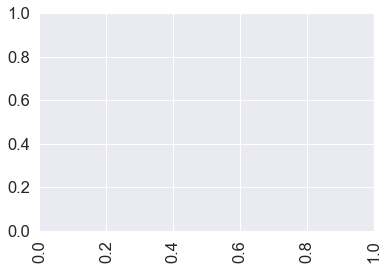

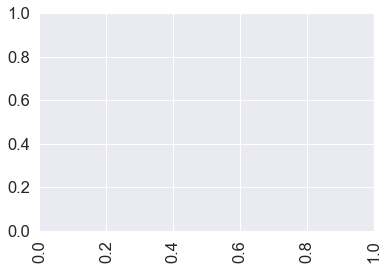

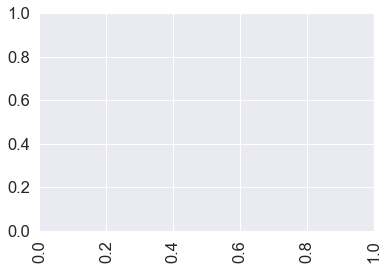

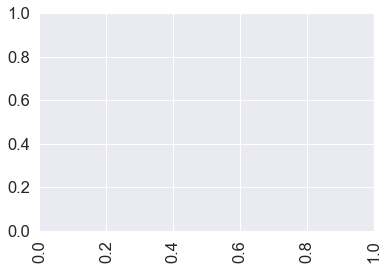

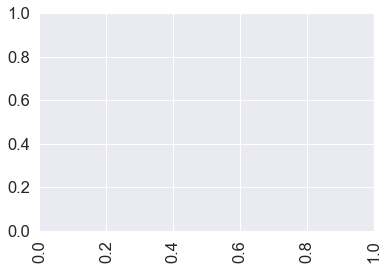

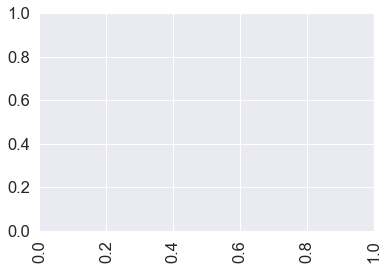

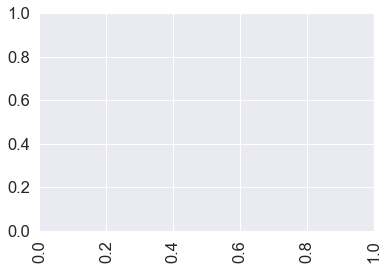

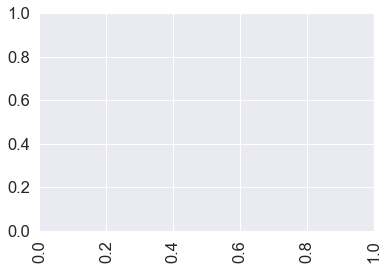

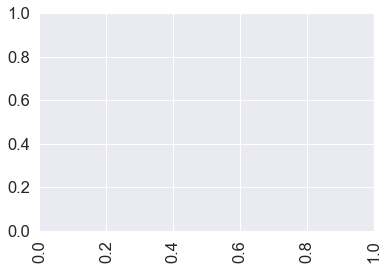

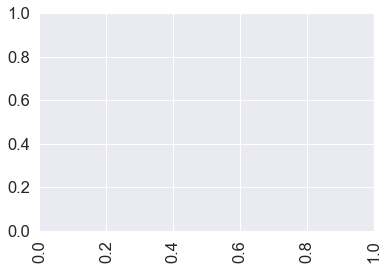

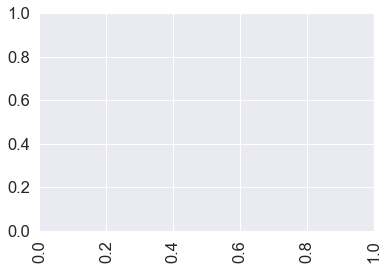

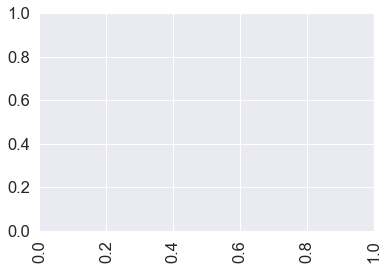

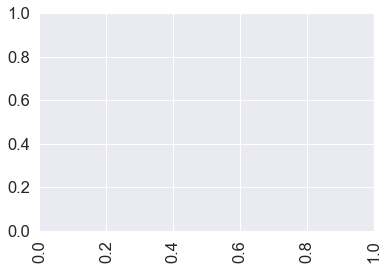

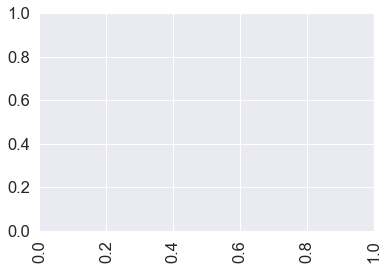

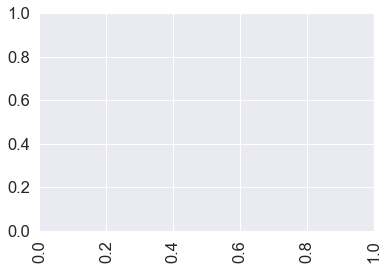

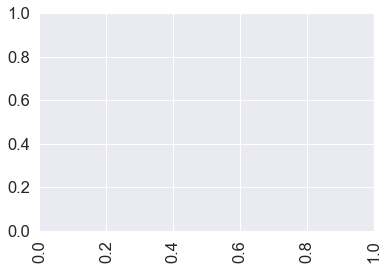

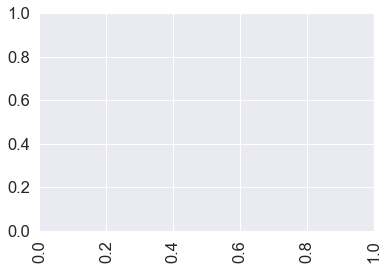

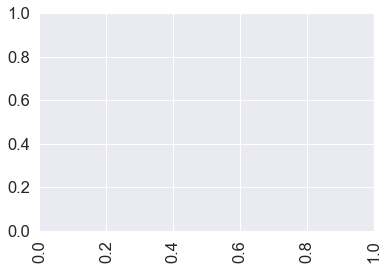

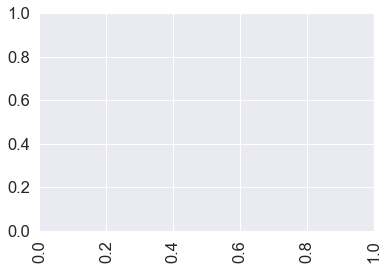

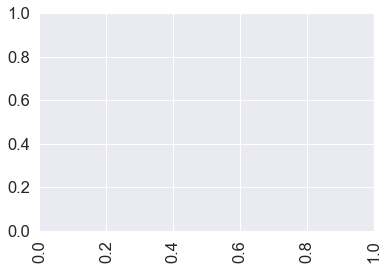

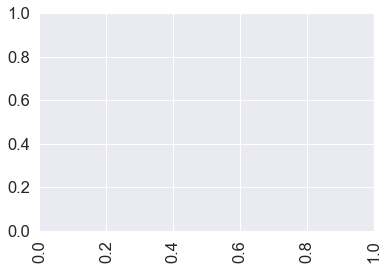

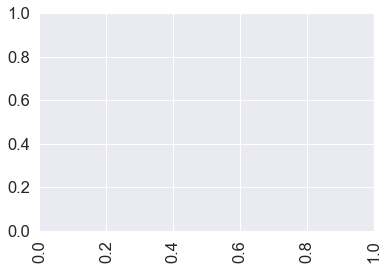

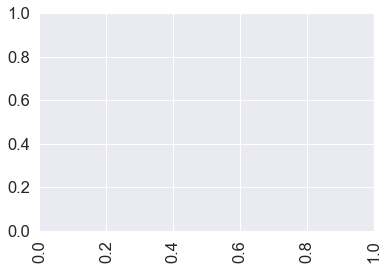

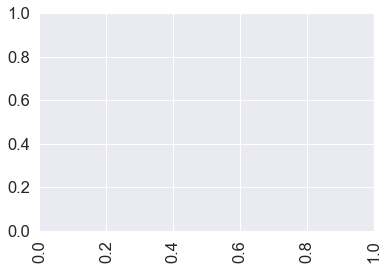

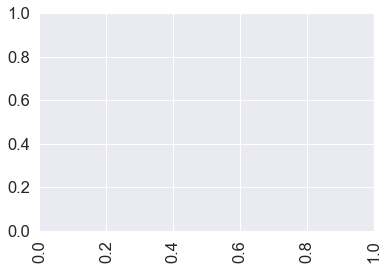

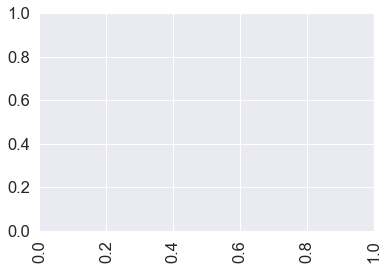

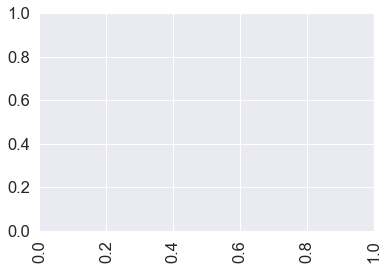

In [57]:
plt.figure(figsize = (30,10))
sns.set(font_scale=1.5, palette = "dark")

ax = sns.barplot(data=mf_summary, x = "Manufacturing Site", y="Freight Cost (USD)" , ci = None, estimator = sum )
plt.title("Frieght cost by Manufacturing Site", fontsize = 20)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+10, ha="center", s="{:.0f}".format(height))
    plt.xticks(rotation ="vertical")
    plt.show()

# total freight cost for top 10 manufacturing site

In [59]:

total_freight= data.groupby(["Manufacturing Site"])["Freight Cost (USD)"].sum().nlargest(10)
total_freight.head()

Manufacturing Site
Aurobindo Unit III, India               15,079,179.67
Mylan (formerly Matrix) Nashik          11,484,369.66
Hetero Unit III Hyderabad IN             6,898,490.39
Cipla, Goa, India                        4,480,821.05
Strides, Bangalore, India.               3,671,135.16
Name: Freight Cost (USD), dtype: float64

In [60]:
prdt_summary = data.groupby("Product Group").count().reset_index()
prdt_summary.head()

,Product Group,ï»¿Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Vendor,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,ACT,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
1,ANTM,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
2,ARV,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539


# Frieght cost by Product Group

In [61]:
prdt_summary = data.groupby(["Product Group"]).agg({"PO / SO #":"count","Freight Cost (USD)":"sum"}).reset_index()
prdt_summary.head()

,Product Group,PO / SO #,Freight Cost (USD)
0,ACT,13,"113,869.55"
1,ANTM,18,"129,649.87"
2,ARV,4539,"48,924,295.80"


Text(0.5, 1.0, 'Frieght cost by Product Group')

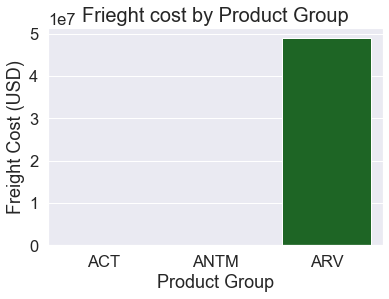

In [62]:

sns.set(font_scale=1.5, palette = "dark")

ax = sns.barplot(data=prdt_summary, x = "Product Group", y="Freight Cost (USD)" , ci = None, estimator = sum )
plt.title("Frieght cost by Product Group", fontsize = 20)
